In [21]:
import pandas as pd

# Load the stock market data from the downloaded CSV file
data = pd.read_csv('AAPL.csv')  # Replace 'AAPL.csv' with the name of your downloaded file

data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-06-25,0.370536,0.372768,0.359375,0.368304,0.294235,122001600
1,1990-06-26,0.372768,0.375000,0.360491,0.362723,0.289777,127254400
2,1990-06-27,0.363839,0.375000,0.359375,0.370536,0.296018,97227200
3,1990-06-28,0.381696,0.386161,0.372768,0.383929,0.306718,249939200
4,1990-06-29,0.383929,0.400670,0.381696,0.399554,0.319201,325192000


In [22]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)




In [23]:
print("\nData shape:")
print(data.shape)


Data shape:
(8313, 6)


In [19]:
data.isnull().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
SMA_20       19
SMA_50       49
dtype: int64

In [5]:
# Handling missing values
data.dropna(inplace=True)




In [8]:
# Feature engineering
# Adding additional features such as moving averages, technical indicators, etc.
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

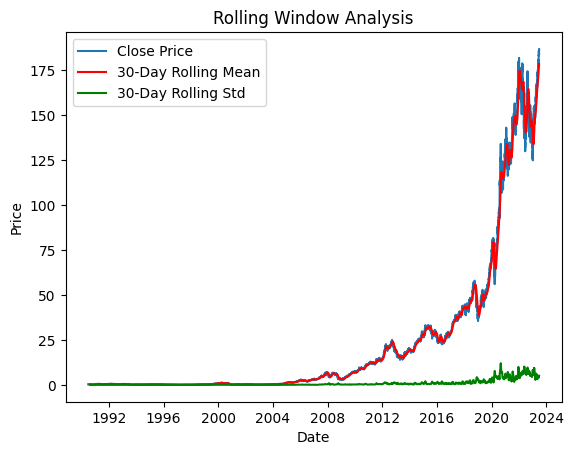

In [14]:
# Rolling window analysis
rolling_mean = data['Close'].rolling(window=30).mean()
rolling_std = data['Close'].rolling(window=30).std()

plt.plot(data.index, data['Close'], label='Close Price')
plt.plot(data.index, rolling_mean, label='30-Day Rolling Mean', color='red')
plt.plot(data.index, rolling_std, label='30-Day Rolling Std', color='green')
plt.legend()
plt.title('Rolling Window Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


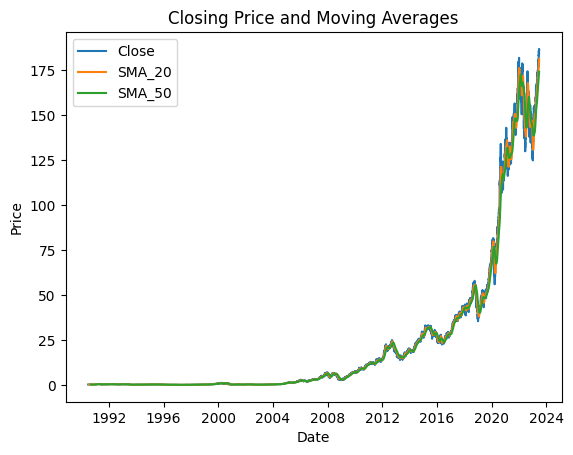

In [6]:
import matplotlib.pyplot as plt

# Plot closing price and moving averages
plt.plot(data.index, data['Close'], label='Close')
plt.plot(data.index, data['SMA_20'], label='SMA_20')
plt.plot(data.index, data['SMA_50'], label='SMA_50')
plt.legend()
plt.title('Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()



Statistical summary of data:
              Open         High          Low        Close    Adj Close  \
count  8313.000000  8313.000000  8313.000000  8313.000000  8313.000000   
mean     23.225139    23.487828    22.972143    23.241308    22.337854   
std      41.796156    42.294148    41.333862    41.838856    41.511711   
min       0.114955     0.118304     0.113839     0.115513     0.098179   
25%       0.381696     0.388393     0.372768     0.381696     0.319820   
50%       3.031071     3.071786     2.993571     3.029643     2.575023   
75%      25.572500    25.735001    25.342501    25.565001    23.180744   
max     186.729996   187.559998   185.009995   187.000000   187.000000   

             Volume       SMA_20       SMA_50  
count  8.313000e+03  8294.000000  8264.000000  
mean   3.719507e+08    23.083906    22.849831  
std    3.621699e+08    41.496480    41.006935  
min    2.396800e+06     0.126451     0.141378  
25%    1.361024e+08     0.382583     0.382424  
50%    2.553432

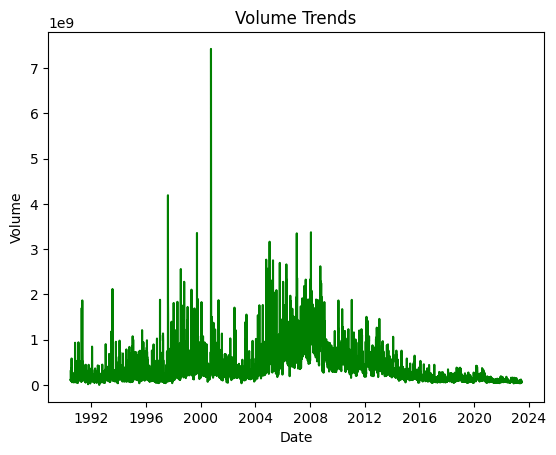

In [16]:
# More data exploration
print("\nStatistical summary of data:")
print(data.describe())

# Visualize volume trends over time
plt.plot(data.index, data['Volume'], color='green')
plt.title('Volume Trends')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


In [13]:
# Correlation analysis
correlation_matrix = data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)



Correlation matrix:
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999937  0.999924  0.999841   0.999587 -0.319380   
High       0.999937  1.000000  0.999909  0.999925   0.999688 -0.318799   
Low        0.999924  0.999909  1.000000  0.999927   0.999667 -0.320231   
Close      0.999841  0.999925  0.999927  1.000000   0.999754 -0.319516   
Adj Close  0.999587  0.999688  0.999667  0.999754   1.000000 -0.319336   
Volume    -0.319380 -0.318799 -0.320231 -0.319516  -0.319336  1.000000   
SMA_20     0.998836  0.998888  0.998685  0.998713   0.998485 -0.319121   
SMA_50     0.996790  0.996928  0.996609  0.996719   0.996529 -0.320258   

             SMA_20    SMA_50  
Open       0.998836  0.996790  
High       0.998888  0.996928  
Low        0.998685  0.996609  
Close      0.998713  0.996719  
Adj Close  0.998485  0.996529  
Volume    -0.319121 -0.320258  
SMA_20     1.000000  0.998752  
SMA_50     0.998752  1.000000  


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Train the ARIMA model
train_size = int(len(data) * 0.8)
train_data = data['Close'][:train_size]
test_data = data['Close'][train_size:]

model = ARIMA(train_data, order=(5,1,0))  # Example order, adjust as needed
model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


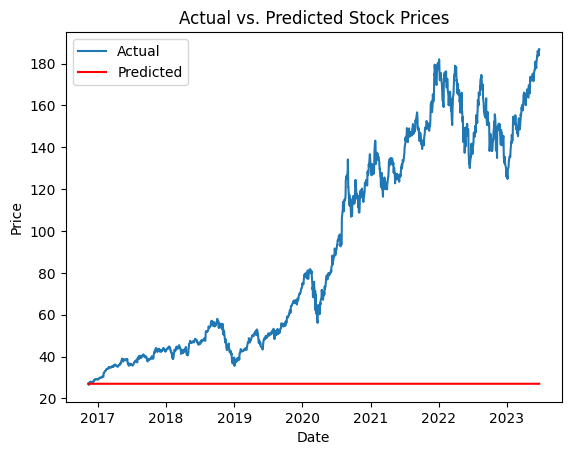

In [9]:
# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Plot actual vs. predicted stock prices
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
mse = mean_squared_error(test_data, predictions)
rmse = mse ** 0.5
print("\nRoot Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 82.14712717427172
